In [ ]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve
import joblib
import os


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1') # Load the dataset

In [ ]:
df.head() # Display the first few rows of the DataFrame

,col1,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"TTYL, gotta run.",NaN,NaN,NaN
1,spam,?? Your account has been hacked! ?? Click here...,NaN,NaN,NaN
2,spam,Unlock the secrets of the universe.,NaN,NaN,NaN
3,ham,"Help me with this math problem, plz?",NaN,NaN,NaN
4,spam,$$$ Get rich quick! $$$ Click here to learn more.,NaN,NaN,NaN


In [ ]:
# Drop unnecessary columns, but only if they exist
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
for column in columns_to_drop:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

In [ ]:
df.head()# Display the first few rows after dropping columns

,col1,message
0,ham,"TTYL, gotta run."
1,spam,?? Your account has been hacked! ?? Click here...
2,spam,Unlock the secrets of the universe.
3,ham,"Help me with this math problem, plz?"
4,spam,$$$ Get rich quick! $$$ Click here to learn more.


In [ ]:
df.shape# Check the shape of the DataFrame

(5573, 2)

In [ ]:
df['message']# Access column message


,message
0,"TTYL, gotta run."
1,?? Your account has been hacked! ?? Click here...
2,Unlock the secrets of the universe.
3,"Help me with this math problem, plz?"
4,$$$ Get rich quick! $$$ Click here to learn more.
...,...
5568,This is the 2nd time we have tried 2 contact u...
5569,Will ?_ b going to esplanade fr home?
5570,"Pity, * was in mood for that. So...any other s..."
5571,The guy did some bitching but I acted like i'd...


In [ ]:
df.drop_duplicates(inplace=True)# Remove duplicate rows

<Axes: xlabel='col1'>

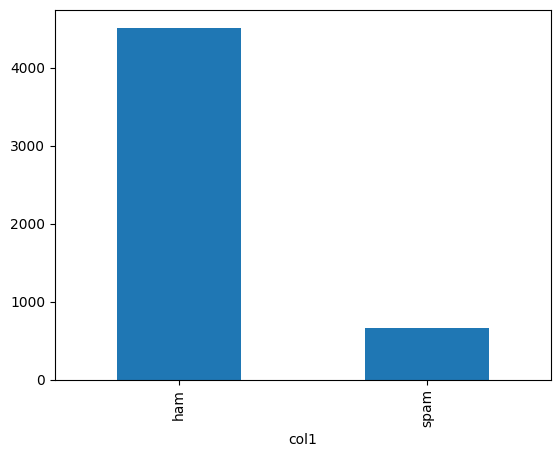

In [ ]:
df['col1'].value_counts().plot.bar()# Visualize the distribution of ham and spam

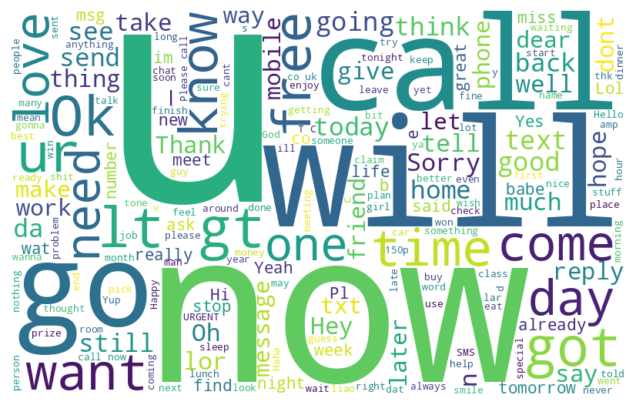

In [ ]:
text=' '.join(df['message']) # make a word cloud for all text data in message
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# data preprocessing, function to convert text to lowercase
def lowerChange(text):
    return text.lower()

In [ ]:
# Apply lowercase conversion to message
df['message']=df['message'].apply(lowerChange)
df['message']

,message
0,"ttyl, gotta run."
1,?? your account has been hacked! ?? click here...
2,unlock the secrets of the universe.
3,"help me with this math problem, plz?"
4,$$$ get rich quick! $$$ click here to learn more.
...,...
5568,this is the 2nd time we have tried 2 contact u...
5569,will ?_ b going to esplanade fr home?
5570,"pity, * was in mood for that. so...any other s..."
5571,the guy did some bitching but i acted like i'd...


In [ ]:
def Preprocess(text):
    #Remove punctations & numbers
    text=re.sub(r"[^a-zA-Z]", " ", text)

    #tokenize sentence into words
    words=word_tokenize(text)

    #Remove stopwords
    stop_words=set(stopwords.words("english"))
    words=[word for word in words if word not in stop_words]

    return words

In [ ]:
# Apply preprocessing to column v2 and create a new txt column
df['txt'] = df['message'].apply(Preprocess)
df.head(10)

,col1,message,txt
0,ham,"ttyl, gotta run.","[ttyl, got, ta, run]"
1,spam,?? your account has been hacked! ?? click here...,"[account, hacked, click, reactivate]"
2,spam,unlock the secrets of the universe.,"[unlock, secrets, universe]"
3,ham,"help me with this math problem, plz?","[help, math, problem, plz]"
4,spam,$$$ get rich quick! $$$ click here to learn more.,"[get, rich, quick, click, learn]"
5,ham,reading a good book rn.,"[reading, good, book, rn]"
6,spam,?? lose weight fast without dieting! ?? order ...,"[lose, weight, fast, without, dieting, order]"
7,spam,?? you've won a free iphone! ?? claim your pri...,"[free, iphone, claim, prize]"
8,ham,thinking 'bout getting a new phone.,"[thinking, bout, getting, new, phone]"
9,ham,so stressed about this project.,"[stressed, project]"


In [ ]:
# Drop the original message column
df.drop('message',axis=1,inplace=True)

In [ ]:
# Convert column category to numerical (0 for ham, 1 for spam)
df['col1']=df['col1'].str.replace('ham','0').str.replace('spam','1').astype(int)

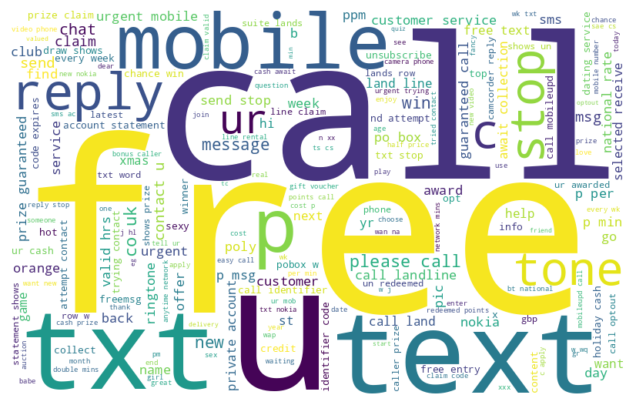

In [ ]:
# Generate a word cloud for data labeled as 1 (spam) - Redundant, same as above
df_1=df[df['col1']==1]

df_1 = df[df['col1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

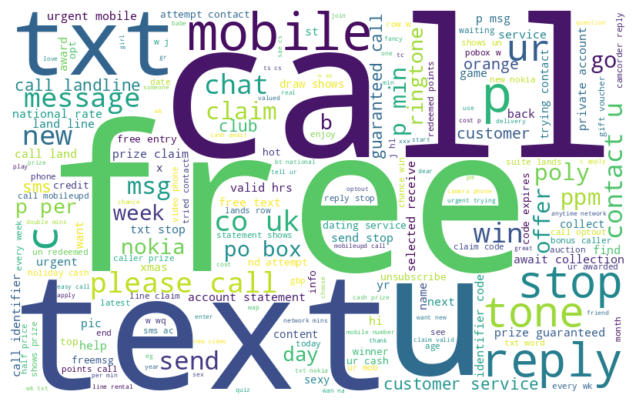

In [ ]:
df_1=df[df['col1']==0]

# Generate and display a word cloud of spam messages from the DataFrame.
df_1 = df[df['col1'] == 1]
text = ' '.join([' '.join(tokens) for tokens in df_1['txt']])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Display the first 5 rows of the DataFrame to get a quick overview of its structure and content.
df.head()

,col1,txt
0,0,"[ttyl, got, ta, run]"
1,1,"[account, hacked, click, reactivate]"
2,1,"[unlock, secrets, universe]"
3,0,"[help, math, problem, plz]"
4,1,"[get, rich, quick, click, learn]"


In [ ]:
 # Prepare text data for CountVectorization by creating sentences from token lists.
countvector = CountVectorizer()
sentence_as_x = [' '.join(tokens) for tokens in df['txt']]

In [ ]:
X = countvector.fit_transform(sentence_as_x)

In [ ]:
#Split the data into training and testing
y = df['col1']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
#GaussianNb
gaussNB = GaussianNB()
gaussNB.fit(X_train,y_train)

#MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train,y_train)

MultinomialNB()

In [ ]:
gaussNBPre = gaussNB.predict(X_test)
multiNBPre = multiNB.predict(X_test)

In [ ]:
print("From Gaussian model",accuracy_score(y_test,gaussNBPre))
print("From Multinomial model",accuracy_score(y_test,multiNBPre))

From Gaussian model 0.8821256038647343
From Multinomial model 0.9719806763285024


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, multiNBPre)

<ipython-input-437-a2b92711a523>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')  # Use 'Greens' colormap, or try others like 'Oranges', 'Reds', etc.


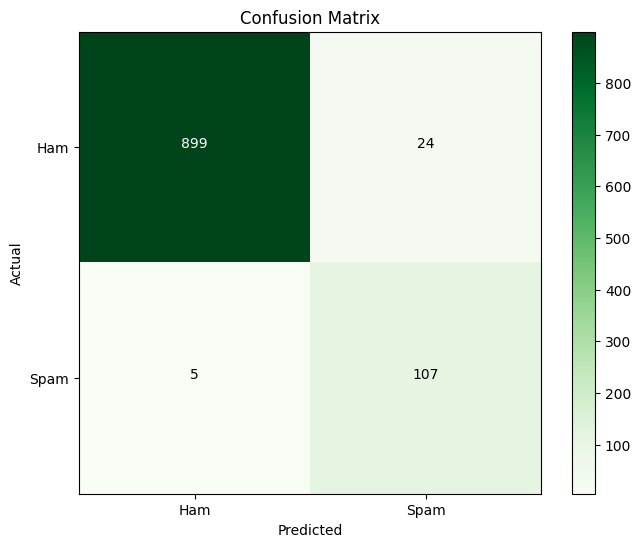

In [ ]:
cmap = plt.cm.get_cmap('Greens')  # Use 'Greens' colormap, or try others like 'Oranges', 'Reds', etc.

# Plot Confusion Matrix with custom colors
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # Apply custom colormap
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Ham', 'Spam'])
plt.yticks(tick_marks, ['Ham', 'Spam'])

# Customize text color based on cell value
for i in range(2):
    for j in range(2):
        text_color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color=text_color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

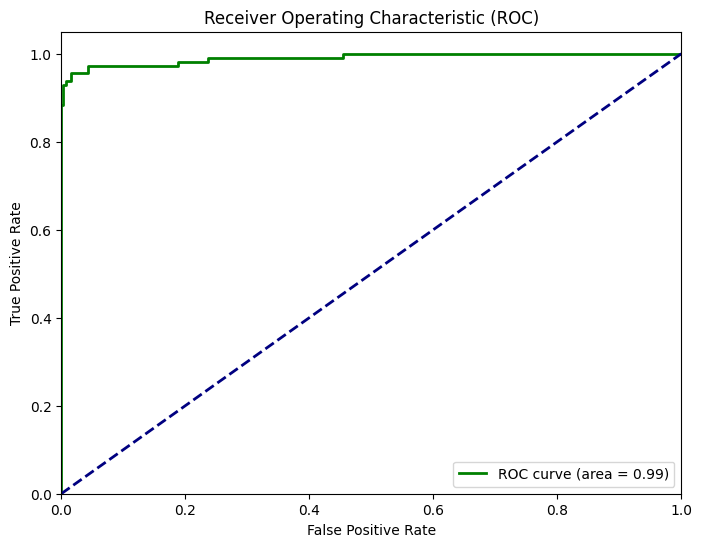

In [ ]:
y_probs = multiNB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Create the 'trainedModels' directory if it doesn't exist
os.makedirs('./trainedModels', exist_ok=True)

In [ ]:
# we can save the models
joblib.dump(countvector, './trainedModels/email_vectorizer.pkl')
joblib.dump(multiNB, './trainedModels/classifier_model.pkl')

['./trainedModels/classifier_model.pkl']

In [ ]:
new_email = "You've won a prize! Click here to claim your reward."

In [ ]:
processed_email = Preprocess(new_email)

In [ ]:
classifier_model  = joblib.load('./trainedModels/classifier_model.pkl')

load_vectorizer = joblib.load('./trainedModels/email_vectorizer.pkl')

In [ ]:
type(classifier_model )

sklearn.naive_bayes.MultinomialNB

In [ ]:
vc_email = load_vectorizer.transform(processed_email)

In [ ]:
mail_prediction = classifier_model .predict(vc_email)

In [ ]:
mail_prediction[0]

0

COMPARISON


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfid.fit_transform(df['txt'].apply(lambda x: ' '.join(x))).toarray() # Use the 'txt' column and join tokens into a single string
y = df['col1'].values  # Assuming 'col1' is your target variable (0 for ham, 1 for spam)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9710144927536232
Precision:  0.9661016949152542

For:  KNN
Accuracy:  0.9120772946859903
Precision:  1.0

For:  NB
Accuracy:  0.9710144927536232
Precision:  1.0

For:  DT
Accuracy:  0.936231884057971
Precision:  0.8627450980392157

For:  LR
Accuracy:  0.9429951690821256
Precision:  0.9263157894736842

For:  RF
Accuracy:  0.966183574879227
Precision:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.9545893719806763
Precision:  0.926605504587156

For:  Bgc
Accuracy:  0.9594202898550724
Precision:  0.8888888888888888

For:  ETC
Accuracy:  0.9710144927536232
Precision:  1.0

For:  GBDT
Accuracy:  0.9478260869565217
Precision:  0.93

For:  xgb
Accuracy:  0.9681159420289855
Precision:  0.9652173913043478
